In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sc

# This package
import XNLdyn

%matplotlib notebook

import os
import pickle


In [53]:
load_dir = './simulation_results/16-06-2022_19-08/'
print(os.listdir(load_dir))

['.ipynb_checkpoints', 'save_dict.pi', 'raw_results.png', 'homogeneous_spectra.png', 'final_spectra.png']


In [54]:
with open(load_dir+'save_dict.pi','rb') as file:
    ld = pickle.load(file)
ld.keys()

dict_keys(['PAR', 'pulse_energy_max', 'N_local_fluences_to_calculate', 'load_spectrum_file', 'N_points_E', 'enax_abs', 'aufloesung', 'fl_dep_spectrum_I', 'fl_dep_spectrum_T', 'N_pulse_energies', 'final_pulse_energies', 'pulse_profile_sigma', 'Nsteps_r', 'final_incidence', 'final_incidence_peaks', 'final_transmissions'])

In [41]:
enax_abs = ld['enax_abs']
dE = enax_abs[1]-enax_abs[0]

In [61]:
ld['PAR'].__dict__

{'kB': 8.617333262145e-05,
 'lightspeed': 299792458,
 'hbar': 6.582119569e-15,
 'echarge': 1.602176634e-19,
 'Nsteps_z': 20,
 'N_photens': 1,
 'N_j': 70,
 'timestep_min': 0.5,
 'Z': 20,
 'atomic_density': 91.4,
 'photon_bandwidth': 0.6,
 'temperature': 300,
 'DoS_band_origin': -10,
 'DoS_band_dd_end': 3.0,
 'M_core': 2,
 'R_VB_0': 10,
 'DoS_shapefile': './DoSdata.npy',
 'tau_CH': 11.42,
 'tau_th': 5,
 'tau_free': 5,
 'lambda_res_Ei': (30,),
 'lambda_nonres': 940,
 'E_f': 850.7,
 'mu_chem': 0,
 'T_0': 300,
 'I0_i': 23547.9683666016,
 't0_i': [0],
 'tdur_sig_i': array([13]),
 'E_i_abs': [844.76],
 'E_i': array([-5.94]),
 'zstepsize': 1.0,
 'zaxis': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19.]),
 'zedges': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 'E_j': array([-1.00000000e+01, -9.56750000e+00, -9.13500000e+00, -8.70250000e+00,
        -8.2

<IPython.core.display.Javascript object>


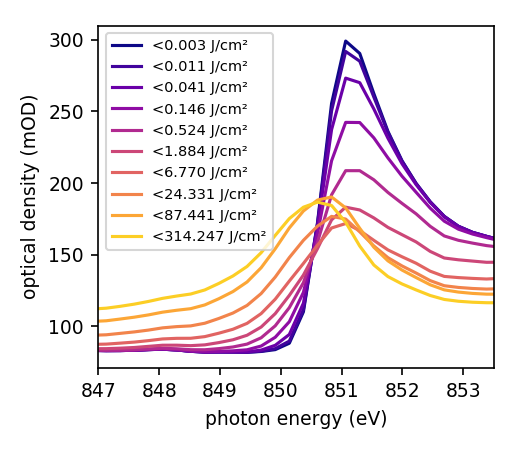

(847, 853.5)

In [59]:
plt.rcParams.update({'font.size': 9})
fig = plt.figure(figsize =(3.5,3.))
plotcols =  mpl.cm.plasma(np.linspace(.0,0.9,ld['N_pulse_energies']))#YlOrRd_r

for i in range(ld['N_pulse_energies'])[::]:
    spec = 1e3*np.log10(ld['final_incidence'][:,i]/ld['final_transmissions'][:,i])
    spec_sm = sc.ndimage.gaussian_filter(spec,ld['aufloesung']/dE)
    #plt.plot(enax_abs, spec, color = plotcols[i], lw=0.5)#, label ='For one z-stack'

    #plt.plot(enax_abs, spec_sm, color = plotcols[i], label = f'{final_pulse_energies[i]*1e6:.2f} µJ')#, label ='For one z-stack'
    fluence_J = ld['final_pulse_energies'][i]
    #{fluence_J*1e9:.3f} nJ,  
    lab =  f"<{1e14*ld['final_incidence_peaks'][i]/XNLdyn.photons_per_J(ld['PAR'].E_i_abs[0]):.3f} J/cm²"
    plt.plot(enax_abs, spec_sm, color = plotcols[i], label =lab)

plt.legend(fontsize = 7)
plt.xlabel('photon energy (eV)')
plt.ylabel('optical density (mOD)')
#plt.title('Spot reconstruction')
plt.tight_layout()
plt.xlim(847, 853.5)

